# Project 2 - Classification
## Predict customers likely to respond to a marketing campaign
### This notebook uses the *campaign.xlsx* dataset

(c) Nuno António 2022 - Rev. 1.0

## Group E

- 20220033 Yramaia Guimarães
- 20221104 Antonina Filatova
- 20220056 Marta Manevska
- 20220044 Ludovico Toscano

## Introduction:

The project was developed considering the following notebooks:

- **1. Project2_EDA**: contains the exploration, data cleaning and feature engeneering. At the end of this notebook there is the comparison of the models and the conclusion of the project;
- **2. Project2 SVM**;
- **3. Project2 Neural Network**;
- **4. Project2 Logistic Regression**;
- **5. Project2 Naïve Bayes**;
- **6. Project2 K-Nearest Neighbor**;
- **7. Project2 Decision tree**;

## Dataset description

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise 
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

[Link to the original dataset](https://github.com/ifood/ifood-data-business-analyst-test)  
[A complete solution](https://github.com/mgermy/project_model_cluster)  
[A smaller one](https://github.com/nailson/ifood-data-business-analyst-test)  
[Here you can find the discussion on kaggle](https://www.kaggle.com/datasets/jackdaoud/marketing-data?select=ifood_df.csv)

We can notice that we can build a monetary feature summing all the features related to monetary, and we can also built a frequency feature summing all the purchases features and then dividing by the dt_customer.  
Maybe can make sense after this engineering is done to make some percentage features, like the percentage spent in one category compared to the total and also the pecentage of purchases done compared to the total.

## Initializations and data loading

In [1]:
# Installing the necessary packages:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualizations

In [ ]:
# Formating that will be applied in all of the notebook
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 15
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 12
heatmaps_text_fontSize = 12

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

# increase the number of columns to display
pd.set_option('display.max_columns', 500)

In [ ]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_excel('campaign.xlsx', engine='openpyxl')
ds.describe(datetime_is_numeric=True, include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,665,2012-08-31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2237.0,NaN,NaN,NaN,303.838623,336.576209,0.0,24.0,173.0,504.0,1493.0


- We can notice that some Z_CostContact and Z-Revenue have a constant value, so they don't bring any information and they can be deleted. 
- Variables ID and year_birth are not listed on the work description. For the task the column ID doesn't provide any information, so it's deleted. 
- We can also see that MntFishProducts has negative values like -1, since this is monetary value it is supposed to be removed.

In [ ]:
# Show top rows
ds.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,88.0,546,172,88,88.0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,1.0,6,2,1,6.0,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,49.0,127,111,21,42.0,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,4.0,20,10,3,5.0,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,43.0,118,46,27,15.0,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2237 non-null   float64
 10  MntFruits            2238 non-null   float64
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2187 non-null   float64
 15  NumDealsPurchases    2240 non-null   i

Here we have some features that are either 0 or 1, that can be changed to uint8 in order to save a little bit of memory. Then we have some float64 that are float because of how numpy works, when you have a NaN the colum is automatically forced to float64. 

In [ ]:
# Check missing values
print(ds.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                3
MntFruits               2
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds           53
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# droping all the rows with a null values since they are only a few of the total
ds.dropna(inplace=True)

In [ ]:
# Removing columns that we don't need
ds.drop(columns=['ID', 'Z_CostContact','Z_Revenue'], inplace=True)

# Changing data type in order to save some memory, a good practice not really needed in this case but a good practice
ds['AcceptedCmp1'] = ds['AcceptedCmp1'].astype('uint8')
ds['AcceptedCmp2'] = ds['AcceptedCmp2'].astype('uint8')
ds['AcceptedCmp3'] = ds['AcceptedCmp3'].astype('uint8')
ds['AcceptedCmp4'] = ds['AcceptedCmp4'].astype('uint8')
ds['AcceptedCmp5'] = ds['AcceptedCmp5'].astype('uint8')
ds['Complain'] = ds['Complain'].astype('uint8')
ds['Response'] = ds['Response'].astype('uint8')
ds['Income'] = ds['Income'].astype('int64')
ds['MntWines'] = ds['MntWines'].astype('int64')
ds['MntFruits'] = ds['MntFruits'].astype('int64')
ds['MntGoldProds'] = ds['MntGoldProds'].astype('int64')

# Changing data type in to be interpreted in the right way
ds['Education'] = ds['Education'].astype('category')
ds['Marital_Status'] = ds['Marital_Status'].astype('category')
ds['Dt_Customer'] = pd.to_datetime(ds['Dt_Customer'])

# Removing miscoded values from MntFishProducts
ds = ds[ds['MntFishProducts'] >= 0].copy()

In [ ]:
# This is the number of duplicates that we have, so we will remove them
ds.duplicated().sum()

168

In [ ]:
ds.drop_duplicates(inplace=True)

In [ ]:
ds['Dt_Customer'].sort_values()

1255   2012-07-30
1363   2012-07-31
2029   2012-08-01
2194   2012-08-01
976    2012-08-01
          ...    
1812   2014-06-28
200    2014-06-29
989    2014-06-29
84     2041-02-25
46     2042-11-09
Name: Dt_Customer, Length: 1988, dtype: datetime64[ns]

Has we can see we have some dates that are outliers, and since this dates are supposed to be before the date of when the dataset was created we will delete this istances.

In [ ]:
ds = ds[ds['Dt_Customer'] < '2015-01-01'].copy()

In [ ]:
ds['Age'] = ds['Dt_Customer'].max().year - ds['Year_Birth']
ds.drop(columns=['Year_Birth'], inplace=True)
ds['Age']

0       57
1       60
2       49
3       30
4       33
        ..
2233    37
2235    47
2237    33
2238    58
2239    60
Name: Age, Length: 1986, dtype: int64

In [ ]:
ds['Customer_Lifetime'] = ds['Dt_Customer'].max() - ds['Dt_Customer']
ds.drop(columns=['Dt_Customer'], inplace=True)
ds['Customer_Lifetime']

0      663 days
1      113 days
2      312 days
3      139 days
4      161 days
         ...   
2233   392 days
2235   381 days
2237   155 days
2238   156 days
2239   622 days
Name: Customer_Lifetime, Length: 1986, dtype: timedelta64[ns]

In [ ]:
ds['Customer_Lifetime'] = ds['Customer_Lifetime'].dt.total_seconds().astype(int) / 86400
ds['Customer_Lifetime']

0       663.0
1       113.0
2       312.0
3       139.0
4       161.0
        ...  
2233    392.0
2235    381.0
2237    155.0
2238    156.0
2239    622.0
Name: Customer_Lifetime, Length: 1986, dtype: float64

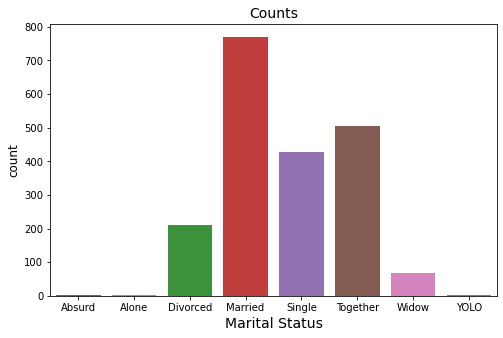

In [ ]:
# Visualising distribution of categorical variables 
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='Marital_Status', data=ds)
_ = plt.xlabel('Marital Status', fontsize=14)
_ = plt.title('Counts', fontsize=14)

Marital status has instances called Absurd, Alone and Yolo, since they are not many, the best option is deleting them, because it is not clear for which status they stand for, single or widow.

In [ ]:
# deleting all the yolo, absurd and alone
ds = ds[~((ds['Marital_Status'] == 'YOLO') | (ds['Marital_Status'] == 'Absurd') | (ds['Marital_Status'] == 'Alone'))].copy()

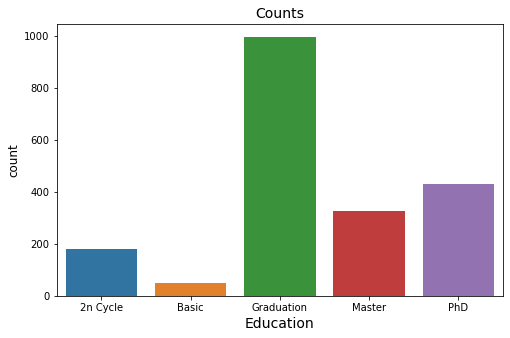

In [ ]:
# Visualising distribution of categorical variables 
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='Education', data=ds)
_ = plt.xlabel('Education', fontsize=14)
_ = plt.title('Counts', fontsize=14)

Note: 2nd cycle in Brazilain system stands for high school

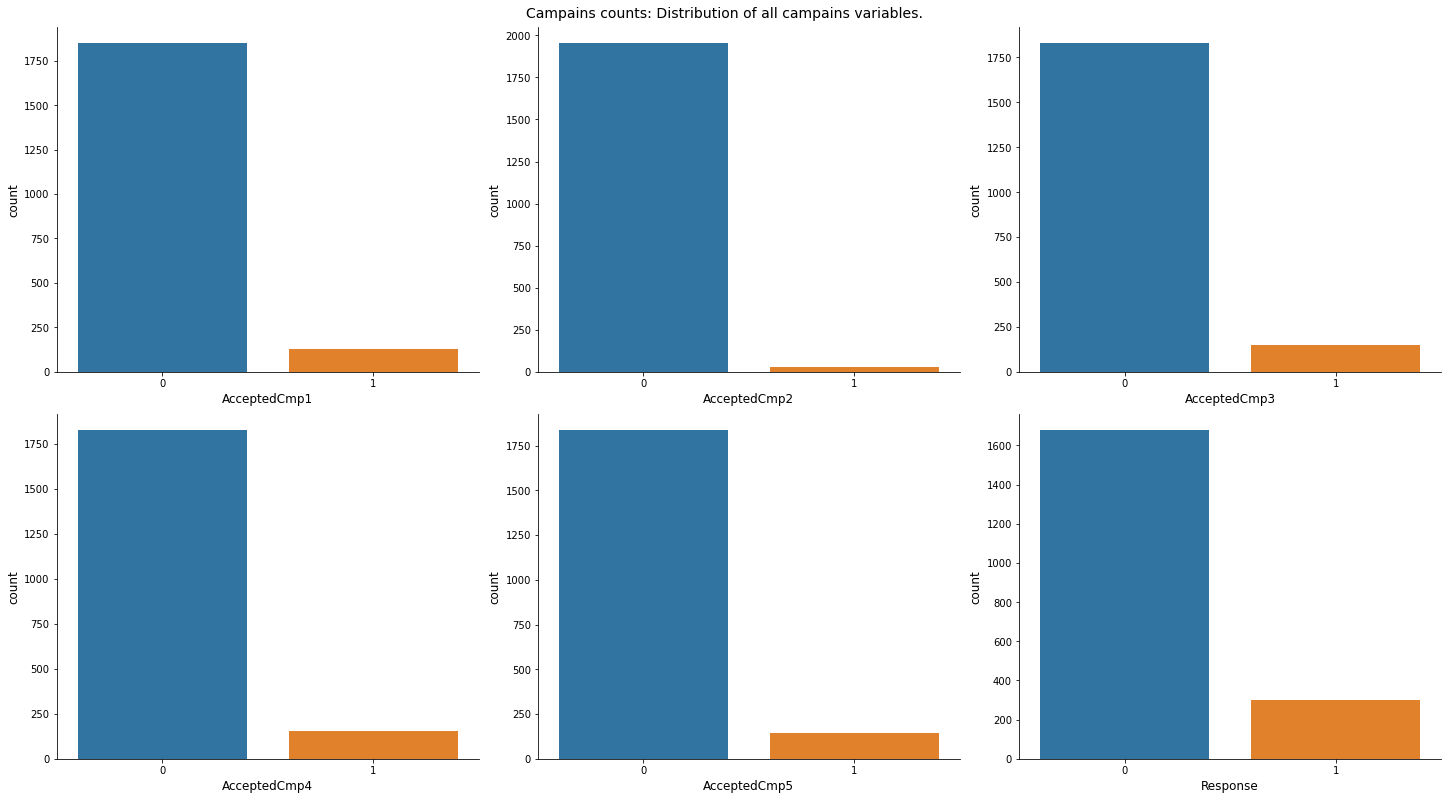

In [ ]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(2, 3, figsize=(20,11), constrained_layout = True) # Added constrained_layout to avoid overlapping
for var, subplot in zip(ds[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']], ax.flatten()):
    g = sns.countplot(x=var, 
                    data=ds,
                    ax=subplot)
    
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Campains counts: Distribution of all campains variables.", fontsize=plots_Title_fontSize);

# Save to file
#fig.savefig(fname=exportsFolder+'MultipleHistogram.svg', bbox_inches="tight")

Here we can see that these classes are unbalanced: for all campaigns the majority of responses is 0

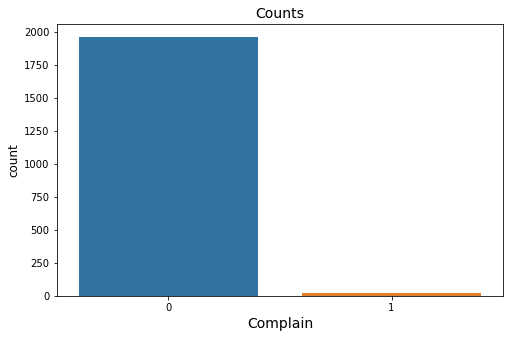

In [ ]:
# Visualising distribution of categorical variables 
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='Complain', data=ds)
_ = plt.xlabel('Complain', fontsize=14)
_ = plt.title('Counts', fontsize=14)

In [ ]:
# Identify all numeric variables in the dataset
columnsToRemove = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']
quantitative = ds.select_dtypes(include=[np.number]).columns.tolist()

for column in columnsToRemove:
    quantitative.remove(column)

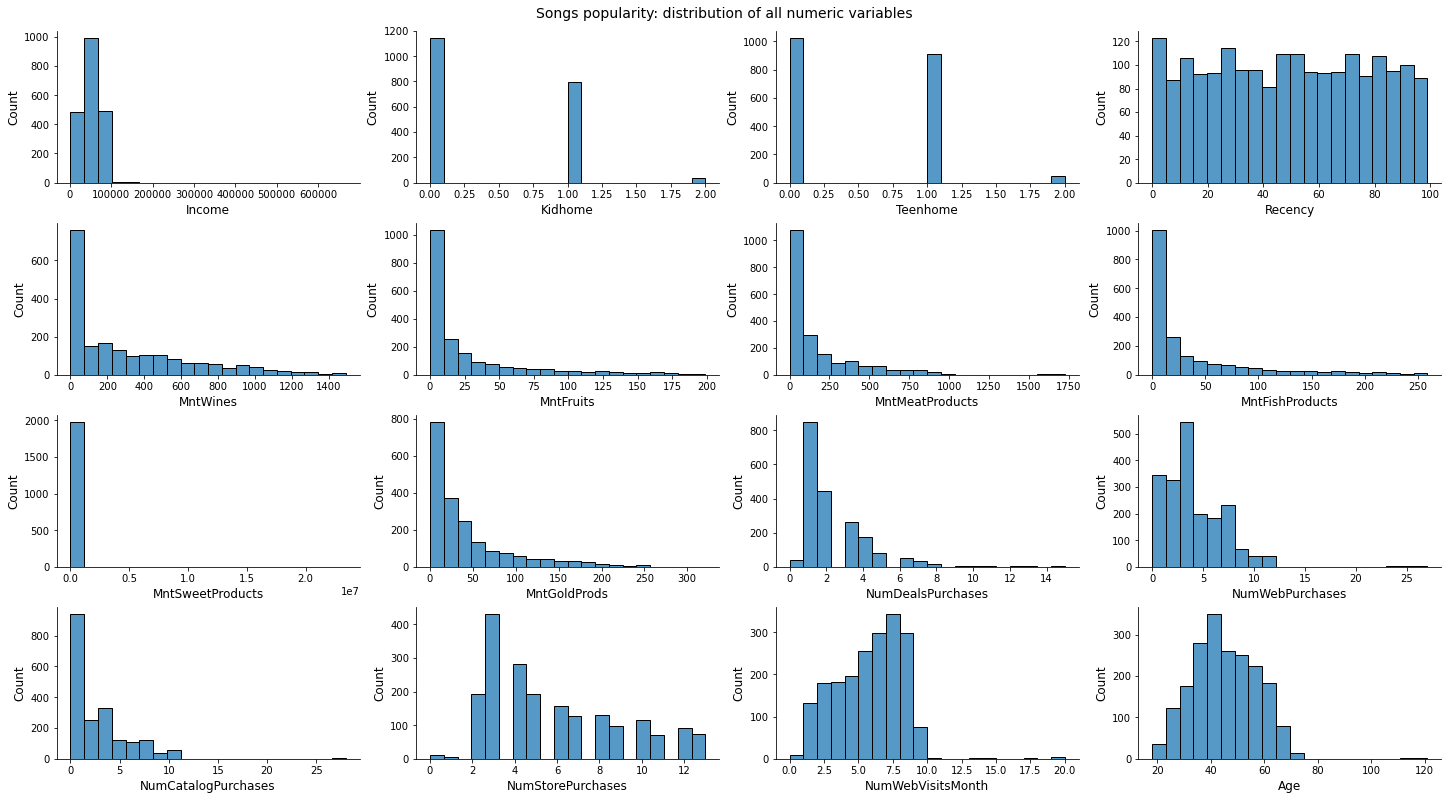

In [ ]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(4, 4, figsize=(20,11), constrained_layout = True) # Added constrained_layout to avoid overlapping
for var, subplot in zip(ds[quantitative], ax.flatten()):
    g = sns.histplot(data=ds,
                bins=20,
                x=var,
                ax=subplot,
                kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Songs popularity: distribution of all numeric variables", fontsize=plots_Title_fontSize);

# Save to file
#fig.savefig(fname=exportsFolder+'MultipleHistogram.svg', bbox_inches="tight")

Observations:
- Outliers on income and year birth.
- Kidhome and teenhome can be transformed into a boolean variable, since there are very few observations with 2. 
- Feature engeneering can be done creating the total monetary value column.

In [ ]:
# Changing these columns to true or false for childs assuming that there is not a big differences in the behavior between having two or one son.

ds['Kidhome'] = np.where(ds['Kidhome'] == 0, 0, 1)
ds['Teenhome'] = np.where(ds['Teenhome'] == 0, 0, 1)
ds['Kidhome'] = ds['Kidhome'].astype('uint8')
ds['Teenhome'] = ds['Teenhome'].astype('uint8')

In [ ]:
quantitative.remove('Kidhome')
quantitative.remove('Teenhome')

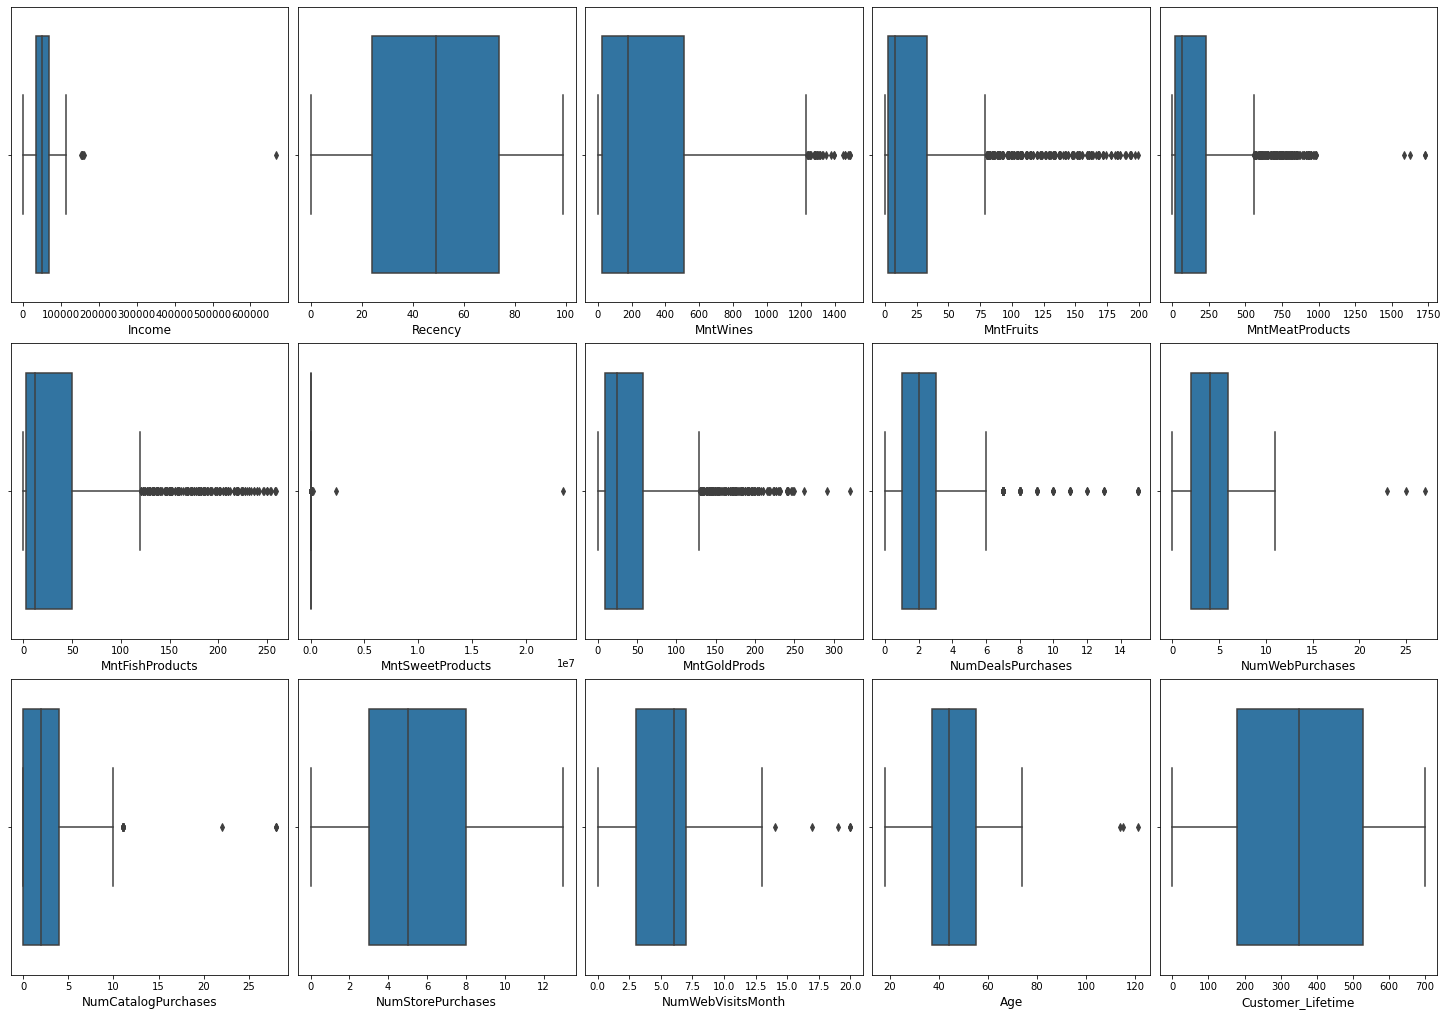

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(20, 14), constrained_layout = True)
for var, subplot in zip(ds[quantitative], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

We can see that MntSweetProducts have some outliers, so we will print them in order to see how to set a threshold.  

In [ ]:
ds['MntSweetProducts'].sort_values()

826            0
316            0
315            0
954            0
311            0
          ...   
1513         197
1898         262
563       234444
523      2342344
634     23423444
Name: MntSweetProducts, Length: 1979, dtype: int64

The outliers are three so we will remove them.

In [ ]:
ds.query('MntSweetProducts > 300')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Lifetime
523,Graduation,Married,70503,0,0,73,1379,33,216,0,2342344,66,1,2,4,9,6,0,1,1,0,0,0,0,61,637.0
563,2n Cycle,Married,62466,0,1,13,129,129,259,168,234444,83,5,6,3,12,4,0,0,0,0,0,0,0,44,165.0
634,Graduation,Single,83917,0,0,12,514,22,732,42,23423444,79,1,6,7,7,3,0,0,0,0,0,0,1,41,437.0


In [ ]:
ds = ds[ds['MntSweetProducts'] < 300].copy()

In [ ]:
ds['Income'].sort_values()

1245      1730
21        2447
1524      3502
1846      4023
1975      4428
         ...  
1653    157146
164     157243
1300    157733
687     160803
2233    666666
Name: Income, Length: 1976, dtype: int64

Same apply to income, removing 666666 and exploring distribution

In [ ]:
ds = ds[ds['Income'] != 666666].copy()

In [ ]:
ds['Age'].sort_values()

1170     18
1850     19
995      19
2213     19
747      19
       ... 
424      73
1950     74
192     114
339     115
239     121
Name: Age, Length: 1975, dtype: int64

There are three values that are outliers. After 74 values are above 100 years old, so it can be set as a threshold for removinf outliers 

In [ ]:
ds = ds[ds['Age'] <= 100].copy()

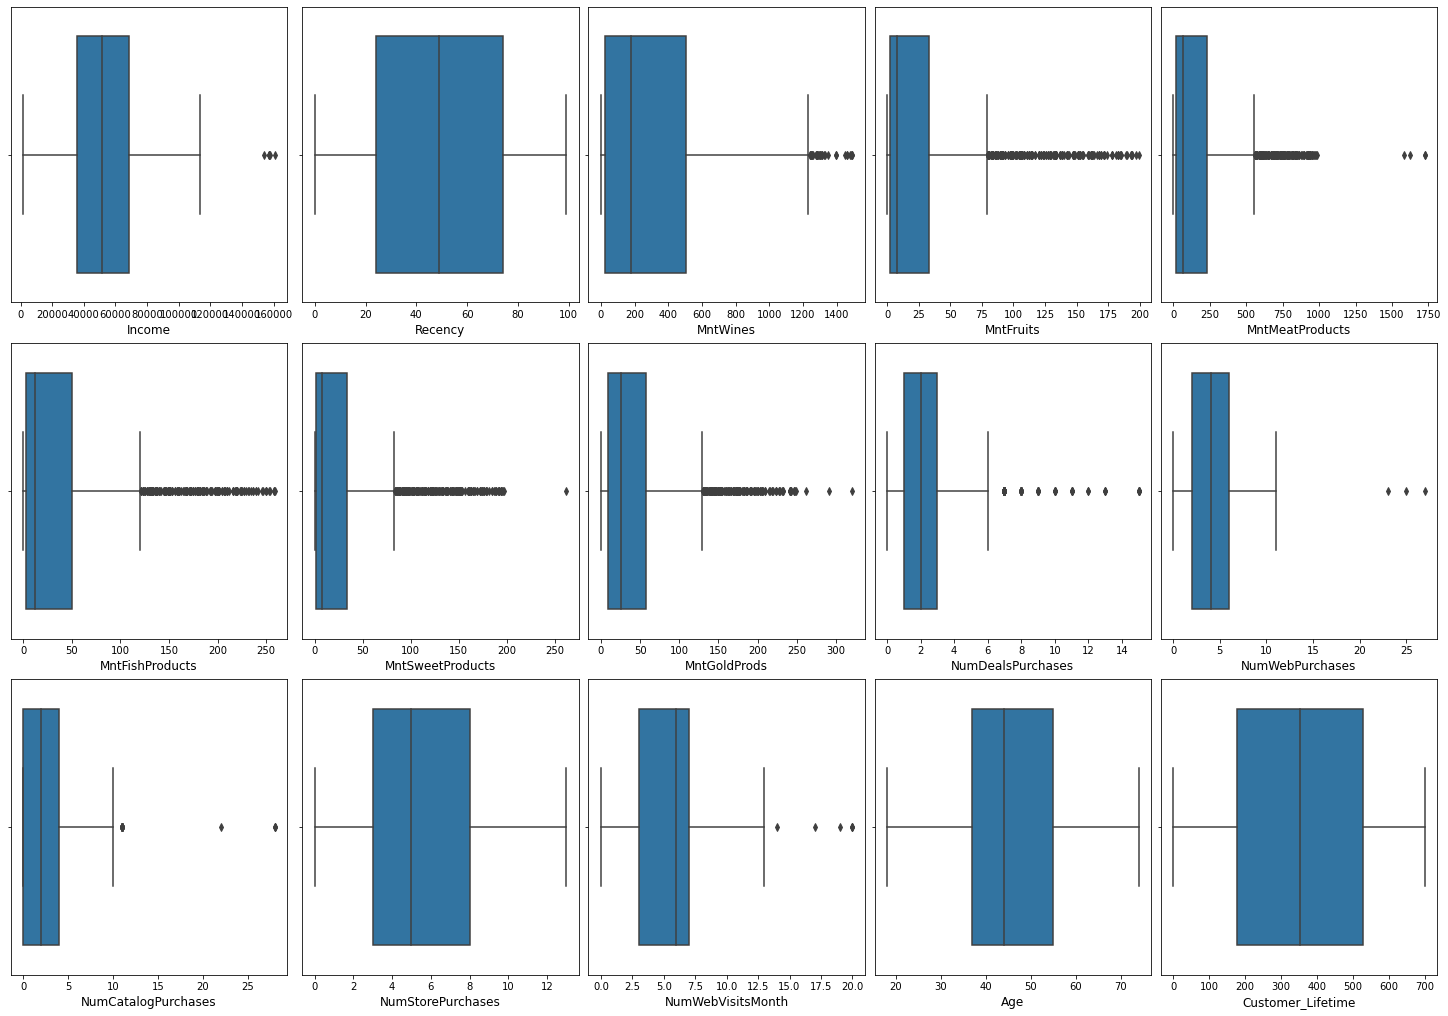

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(20, 14), constrained_layout = True)
for var, subplot in zip(ds[quantitative], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

Most distributions look more balanced, but still income has outliers.
NEED TO MERGE AND CHECK

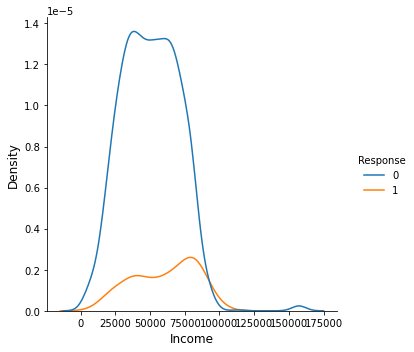

In [ ]:
sns.displot(data=ds, x="Income", kind='kde', hue='Response')

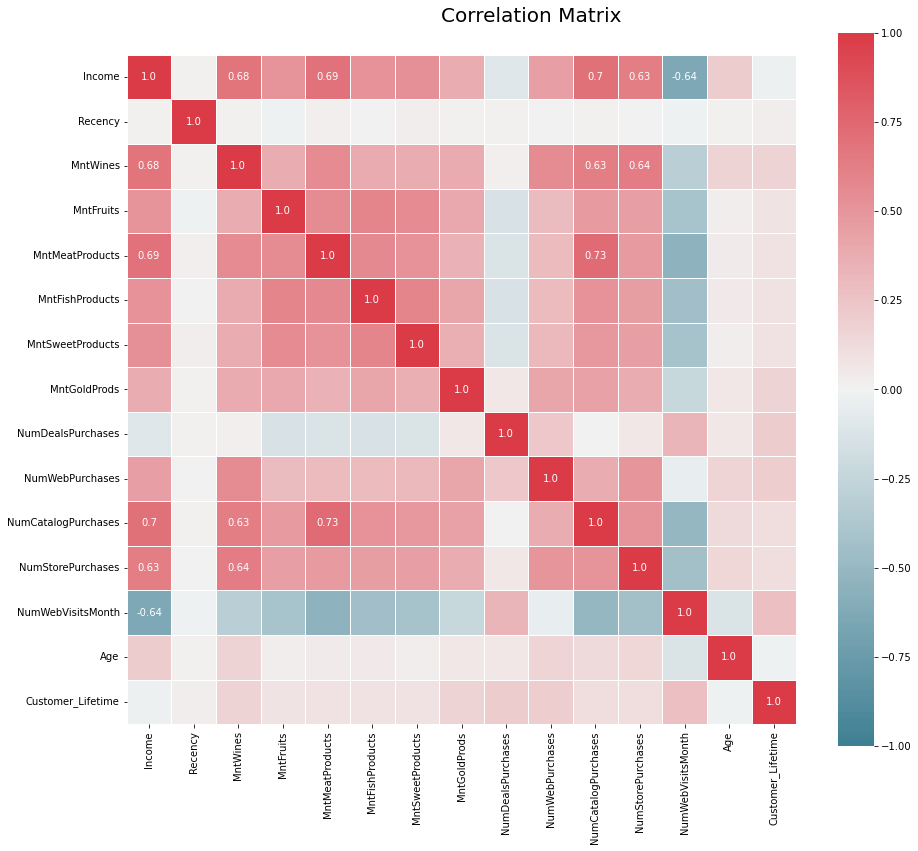

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(15, 12))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(ds[quantitative].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.60
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

# Feature engineering

## Percentage per each category

In [ ]:
allMnt = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

Let's compare all the monetary values in order to understand which campain is the most similar to the target value, we assume that each campaign is about different products and as we can see some of them have different values in different campaigns.

In [ ]:
ds['TotalMnt'] = 0

for mnt in allMnt:
    ds['TotalMnt'] = ds['TotalMnt'] + ds[mnt]

In [ ]:
percentAllMnt = []

for mnt in allMnt:
    percentAllMnt.append('Percent'+mnt)
    ds['Percent'+mnt] = ds[mnt] / ds['TotalMnt']

Let's compare the distribution of the amount spent in a category vs the percentage spent per category.

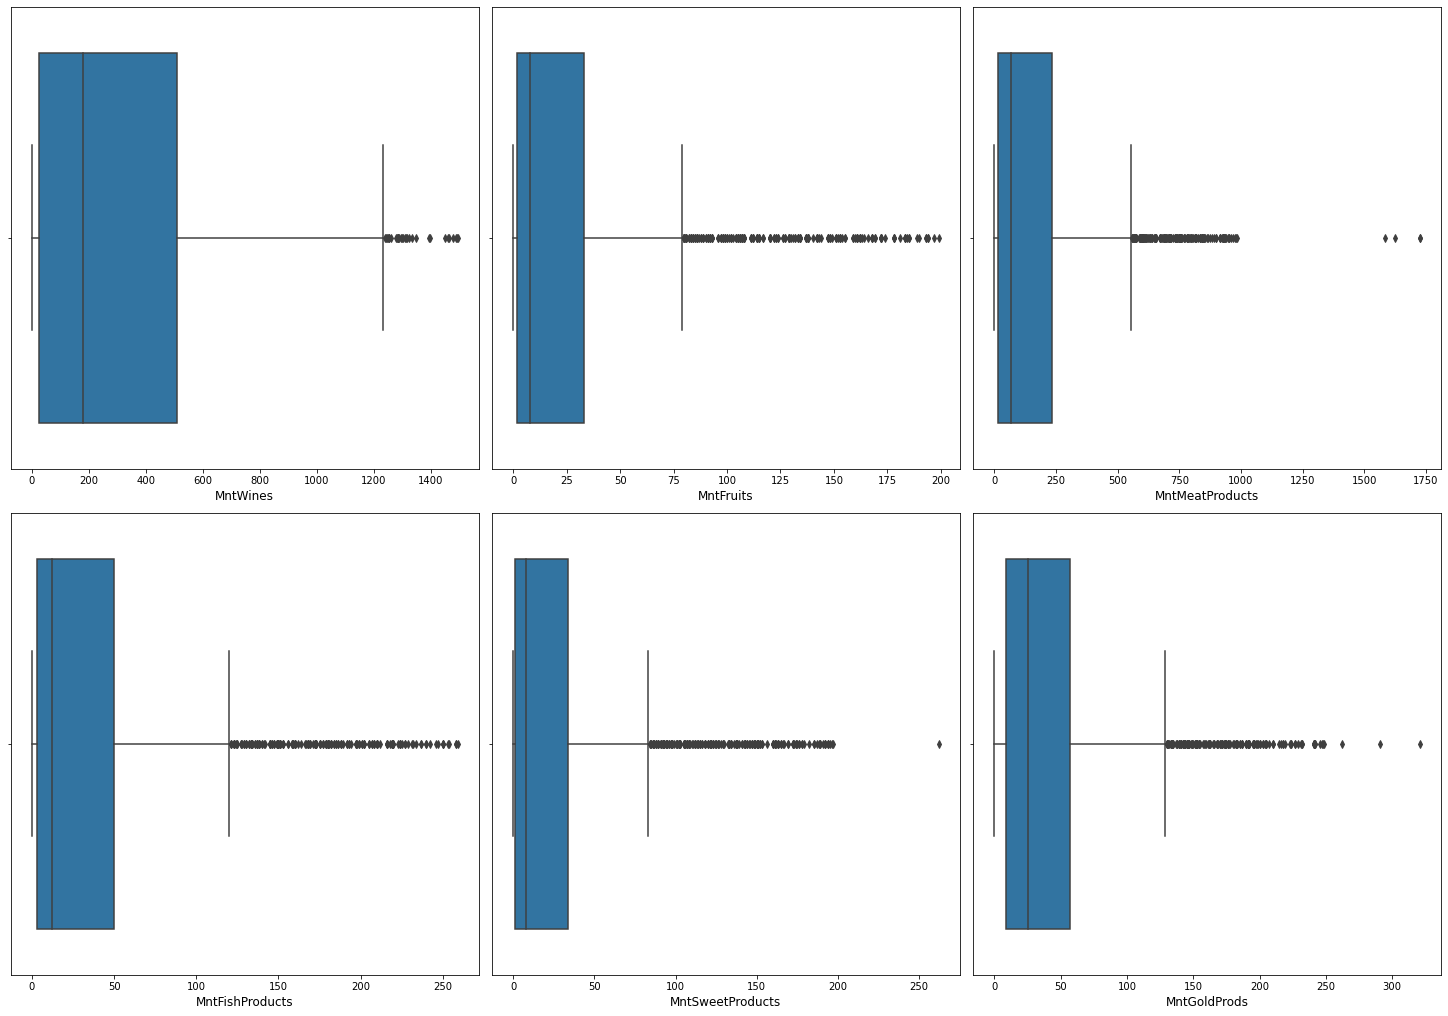

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 14), constrained_layout = True)
for var, subplot in zip(ds[allMnt], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

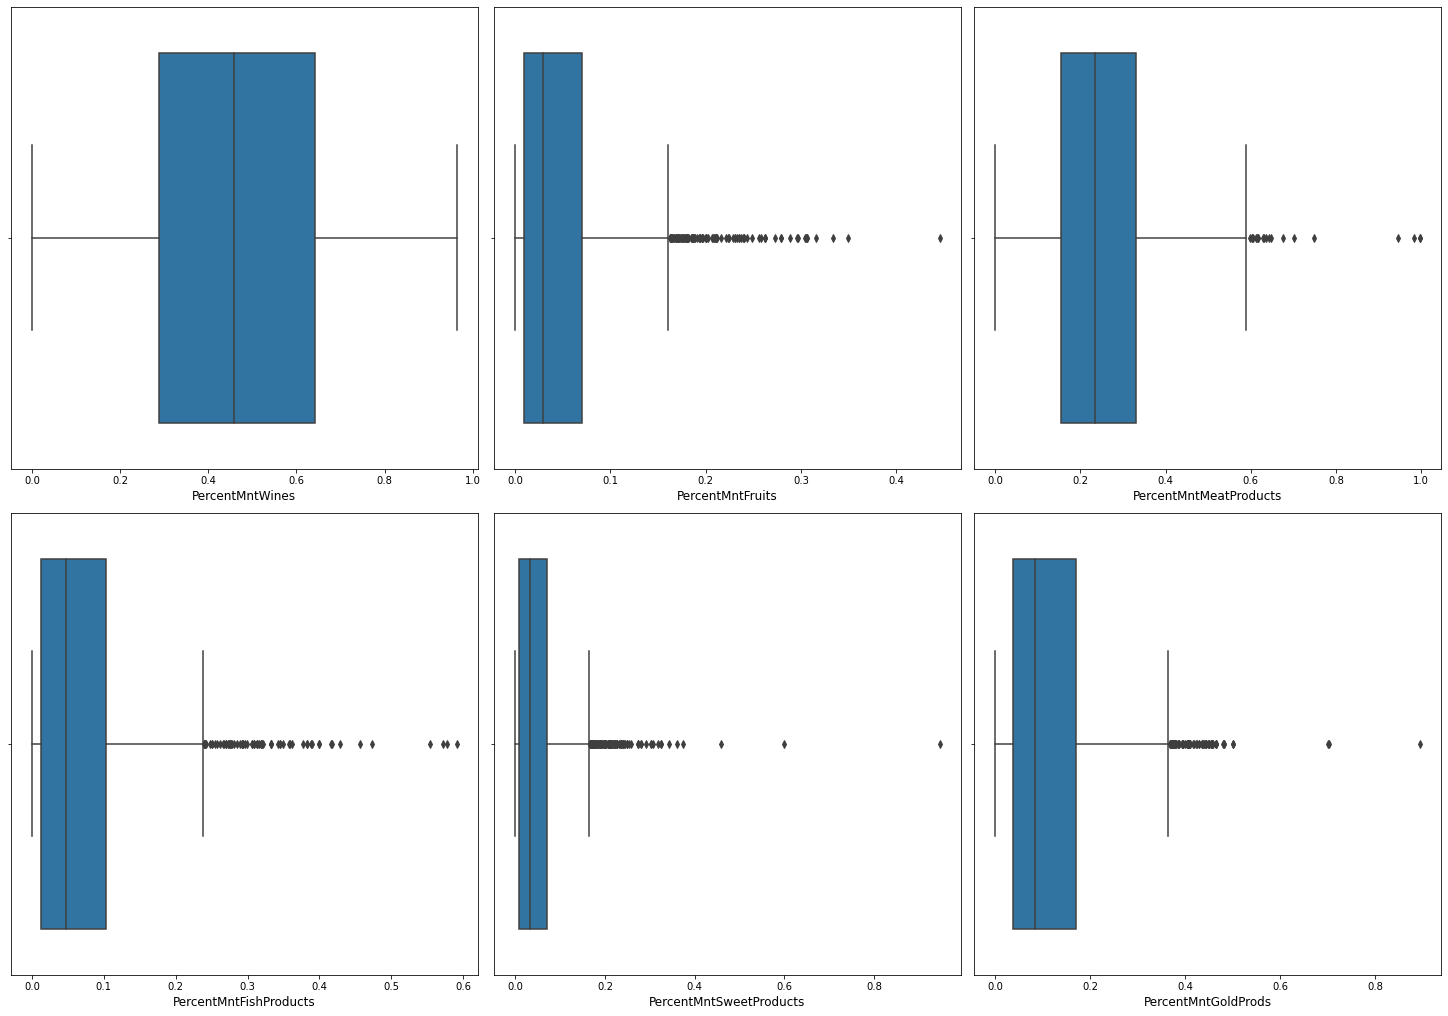

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 14), constrained_layout = True)
for var, subplot in zip(ds[percentAllMnt], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

One of the reasons of why we should use the percentage instead of the amount spent in a category is that we can deal with outliers in this way, for examples the distribution for wines and meat have less outliers then before now but isn't true for the other categories.  
Beside that this new feauters are able to capture another type of information compared to the amount spent, because the amount spent is influenced by how much do you earn in this case we are seeing the how much do you spend in product instead of another one. 

In [ ]:
dsCampaigns = pd.DataFrame({'AcceptedCmp1' : ds.query('AcceptedCmp1 == 1')[percentAllMnt].mean()})
dsCampaigns['AcceptedCmp2'] = ds.query('AcceptedCmp2 == 1')[percentAllMnt].mean().to_frame()
dsCampaigns['AcceptedCmp3'] = ds.query('AcceptedCmp3 == 1')[percentAllMnt].mean().to_frame()
dsCampaigns['AcceptedCmp4'] = ds.query('AcceptedCmp4 == 1')[percentAllMnt].mean().to_frame()
dsCampaigns['AcceptedCmp5'] = ds.query('AcceptedCmp5 == 1')[percentAllMnt].mean().to_frame()
dsCampaigns['Response'] = ds.query('Response == 1')[percentAllMnt].mean().to_frame()
dsCampaigns

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
PercentMntWines,0.517797,0.669391,0.450362,0.702500,0.536280,0.452404
PercentMntFruits,0.035057,0.018588,0.043537,0.020761,0.034274,0.044330
PercentMntMeatProducts,0.287453,0.188695,0.223110,0.177044,0.292055,0.280893
PercentMntFishProducts,0.060249,0.030275,0.052555,0.028955,0.046229,0.055814
PercentMntSweetProducts,0.045088,0.024754,0.037925,0.022818,0.042184,0.046884
PercentMntGoldProds,0.054356,0.068297,0.192510,0.047923,0.048977,0.119674


What we tried to do is to see what people that have accepted different campaigns usually spend has an average in each type of products. So what we can notice is that probably campaign 3 is similar to the last one, because we assume that each camapaign is about different categories so if the percentage are the same we assume that the campaign is similar. This can be improved seen the percentage of each channel for each camapaign.

## Creating frequency

In [ ]:
ds['Frequency'] = ds['NumWebPurchases'] + ds['NumCatalogPurchases'] + ds['NumStorePurchases']

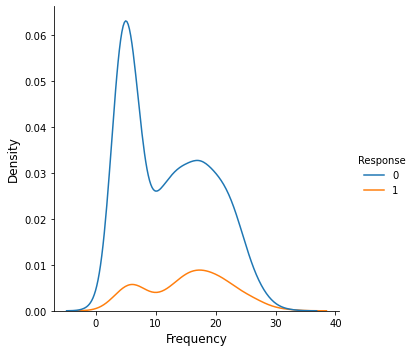

In [ ]:
sns.displot(data=ds, x="Frequency", kind='kde', hue='Response')

This graph show that Frequency influence the decison of the customer about the campaign. This is similar to the graph about income, we will see later if they are correlated.

In [ ]:
ds.query('Frequency == 0')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Lifetime,TotalMnt,PercentMntWines,PercentMntFruits,PercentMntMeatProducts,PercentMntFishProducts,PercentMntSweetProducts,PercentMntGoldProds,Frequency
655,Graduation,Divorced,153924,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,39,142.0,6,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0
1245,Graduation,Divorced,1730,0,0,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,0,43,42.0,8,0.125000,0.125000,0.375000,0.125000,0.125000,0.125000,0
1524,Graduation,Single,3502,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,41,442.0,5,0.400000,0.200000,0.200000,0.000000,0.000000,0.200000,0
1846,PhD,Married,4023,1,1,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0,51,6.0,9,0.555556,0.000000,0.111111,0.111111,0.111111,0.111111,0
2132,PhD,Married,156924,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,65,304.0,8,0.250000,0.125000,0.250000,0.125000,0.125000,0.125000,0


Frequency revelead that we have some uncorrect values, is clearly a mistake to have frequency equal to zero and also a monetary value so low is suspicious. So we will remove this obsevations.

In [ ]:
ds = ds[ds['Frequency'] != 0].copy()

## Creating the ratio for channel

This ratio can be useful in order to capture which custom channels customers prefer. 
Note: Frequency variable is highly correlated with ratio for channel

In [ ]:
ds['PercentageWebPurchases'] = ds['NumWebPurchases'] / ds['Frequency'] 

<AxesSubplot:xlabel='PercentageWebPurchases'>

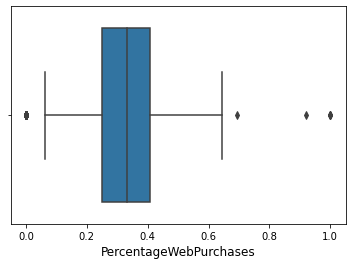

In [ ]:
sns.boxplot(x=ds['PercentageWebPurchases'])

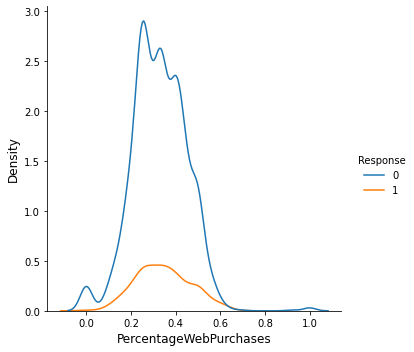

In [ ]:
sns.displot(data=ds, x="PercentageWebPurchases", kind='kde', hue='Response')

In [ ]:
ds['PercentageStorePurchases'] = ds['NumStorePurchases'] / ds['Frequency'] 

<AxesSubplot:xlabel='PercentageStorePurchases'>

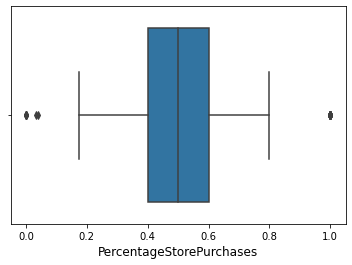

In [ ]:
sns.boxplot(x=ds['PercentageStorePurchases'])

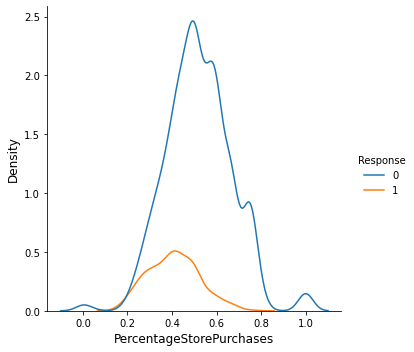

In [ ]:
sns.displot(data=ds, x="PercentageStorePurchases", kind='kde', hue='Response')

In [ ]:
ds['PercentageCatalogPurchases'] = ds['NumCatalogPurchases'] / ds['Frequency'] 

<AxesSubplot:xlabel='PercentageCatalogPurchases'>

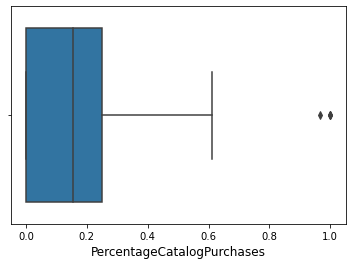

In [ ]:
sns.boxplot(x=ds['PercentageCatalogPurchases'])

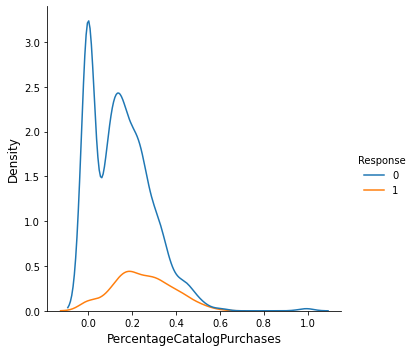

In [ ]:
sns.displot(data=ds, x="PercentageCatalogPurchases", kind='kde', hue='Response')

Here we can notice that those that buy from the catalog and accept the last campaign have a different distribution. 

## Creating a ratio for purchases bought in a deal

In [ ]:
ds['PercentageDealsPurchases'] = ds['NumDealsPurchases'] / ds['Frequency'] 

<AxesSubplot:xlabel='PercentageDealsPurchases'>

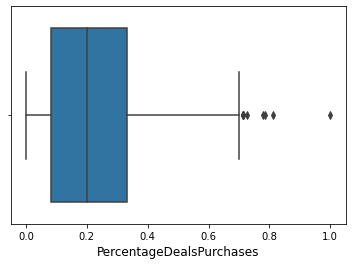

In [ ]:
sns.boxplot(x=ds['PercentageDealsPurchases'])

We can notice that with percentage we are able to see who buy only when there is a deal and also we have less outliers compared to the plot of NumDealsPurchaese

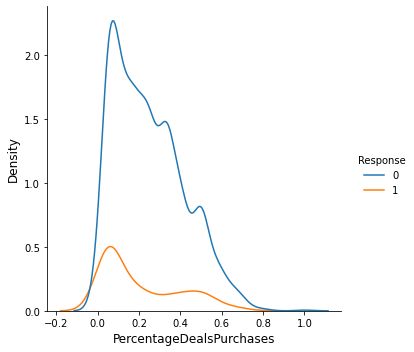

In [ ]:
sns.displot(data=ds, x="PercentageDealsPurchases", kind='kde', hue='Response')

## Creating avg time between transaction

In [ ]:
ds['AvgTimeBetweenTransaction'] = ds['Customer_Lifetime'] / ds['Frequency']

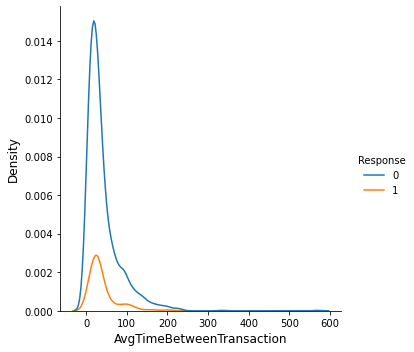

In [ ]:
sns.displot(data=ds, x="AvgTimeBetweenTransaction", kind='kde', hue='Response')

There is a slight difference between who reply positively to the campaign and who not. Some outliers appear but this is normal: high value is a reslut of division of low frequency.

## Creating average purchase

In [ ]:
ds['AvgWebPurchases'] = ds['NumWebPurchases'] / ds['NumWebVisitsMonth']

<AxesSubplot:xlabel='AvgWebPurchases'>

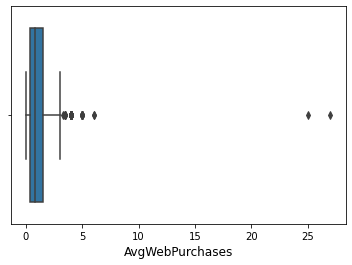

In [ ]:
sns.boxplot(x=ds['AvgWebPurchases'])

Note that the number of purchases is the number of articles purchased by a customer (not how many times a customer bought something).  
There are two outliers, changing their value to a lower value can help the model to understand the data without loosing rows.  
Then we have those that are infinite, for this one we will put 0 instead of the result that we have.

In [ ]:
ds.query('AvgWebPurchases > 20')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Lifetime,TotalMnt,PercentMntWines,PercentMntFruits,PercentMntMeatProducts,PercentMntFishProducts,PercentMntSweetProducts,PercentMntGoldProds,Frequency,PercentageWebPurchases,PercentageStorePurchases,PercentageCatalogPurchases,PercentageDealsPurchases,AvgTimeBetweenTransaction,AvgWebPurchases
905,Graduation,Single,85072,0,0,94,494,92,391,194,11,241,1,3,4,10,0,0,0,0,0,0,0,0,37,81.0,1423,0.347154,0.064652,0.274772,0.136332,0.007730,0.169361,17,0.176471,0.588235,0.235294,0.058824,4.764706,inf
975,Graduation,Married,83715,0,0,2,318,8,407,150,35,8,1,2,8,13,0,0,0,0,0,0,0,0,52,146.0,926,0.343413,0.008639,0.439525,0.161987,0.037797,0.008639,23,0.086957,0.565217,0.347826,0.043478,6.347826,inf
1773,PhD,Together,85431,0,0,54,376,53,462,168,53,53,1,2,7,7,0,0,0,0,0,0,0,0,62,386.0,1165,0.322747,0.045494,0.396567,0.144206,0.045494,0.045494,16,0.125000,0.437500,0.437500,0.062500,24.125000,inf
1806,PhD,Single,7144,0,1,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,0,48,204.0,416,0.194712,0.009615,0.079327,0.012019,0.004808,0.699519,25,0.920000,0.040000,0.040000,0.000000,8.160000,inf
1898,PhD,Single,113734,0,0,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,69,32.0,277,0.021661,0.007220,0.010830,0.003610,0.945848,0.010830,27,1.000000,0.000000,0.000000,0.000000,1.185185,27.0
1910,2n Cycle,Together,92556,0,0,32,493,183,352,184,23,28,0,3,5,13,0,0,0,0,0,0,0,0,54,70.0,1263,0.390340,0.144893,0.278702,0.145685,0.018211,0.022169,21,0.142857,0.619048,0.238095,0.000000,3.333333,inf
1955,PhD,Widow,76842,0,0,37,605,10,345,84,54,32,1,1,8,7,0,0,0,0,0,0,0,0,64,57.0,1130,0.535398,0.008850,0.305310,0.074336,0.047788,0.028319,16,0.062500,0.437500,0.500000,0.062500,3.562500,inf
1975,Graduation,Married,4428,0,1,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,0,45,267.0,359,0.044568,0.011142,0.033426,0.005571,0.011142,0.894150,25,1.000000,0.000000,0.000000,0.000000,10.680000,25.0


In [ ]:
ds['AvgWebPurchases'] = np.where(ds['AvgWebPurchases'] == np.inf, 0, ds['AvgWebPurchases'])
ds['AvgWebPurchases'] = np.where(ds['AvgWebPurchases'] > 6, 7, ds['AvgWebPurchases'])

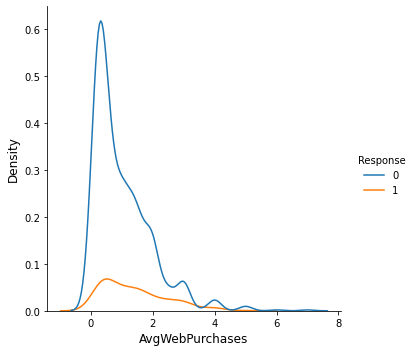

In [ ]:
sns.displot(data=ds, x="AvgWebPurchases", kind='kde', hue='Response')

Also here we have two different shapes based on the response to the last campaign, so seems like that also this feature can be usefull.

## Correlation matrix with new variables

In [ ]:
quantitative += percentAllMnt + ['Frequency','AvgWebPurchases','AvgTimeBetweenTransaction','TotalMnt','PercentageCatalogPurchases','PercentageWebPurchases','PercentageStorePurchases','PercentageDealsPurchases']

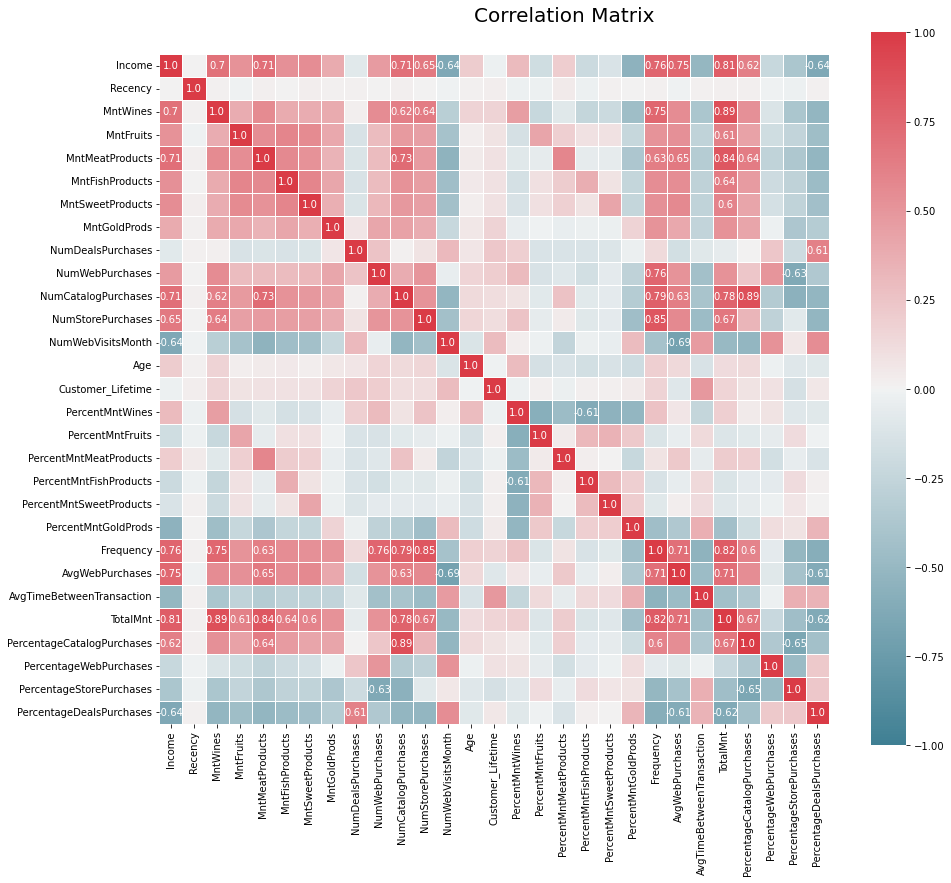

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(15, 12))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(ds[quantitative].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.60
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

- Majority of highly correlated variables belong to the engineered ones.
- The highest correlation observed with income, total monetary and frequency. 
- After trying to remove these variables,we got slightly better results by removing total monetary

## Saving data for modeling part

We conducted experiments using various datasets, including one that retained all features, as well as two others with certain features removed.

In the first dataset, we eliminated features that represented ratios, as well as TotalMnt due to its negative impact on the neural network's performance. Although we considered removing Income and Frequency due to their high correlation, we found that the model performed better with these features included.

In the second dataset, we removed all mnt features and the number of purchases, as these were used to generate ratio features.

### Saving the dataset with new features without percentage spent

Decision tree and neural network work better with this dataset.

In [ ]:
oneHotEncoded = pd.get_dummies(ds, columns=['Education','Marital_Status','Kidhome','Teenhome'])
oneHotEncoded = oneHotEncoded.drop(columns=['PercentMntWines','PercentMntFruits','PercentMntMeatProducts','PercentMntFishProducts','PercentMntSweetProducts','PercentMntGoldProds','Marital_Status_Absurd','Marital_Status_Alone','Marital_Status_YOLO','PercentageCatalogPurchases','PercentageWebPurchases','PercentageStorePurchases','TotalMnt','PercentageDealsPurchases'])
oneHotEncoded.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Lifetime,Frequency,PercentageDealsPurchases,AvgTimeBetweenTransaction,AvgWebPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kidhome_0,Kidhome_1,Teenhome_0,Teenhome_1
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,663.0,22,0.136364,30.136364,1.142857,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,113.0,4,0.500000,28.250000,0.200000,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,312.0,20,0.050000,15.600000,2.000000,0,0,1,0,0,0,0,0,1,0,1,0,1,0
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,139.0,6,0.333333,23.166667,0.333333,0,0,1,0,0,0,0,0,1,0,0,1,1,0
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,161.0,14,0.357143,11.500000,1.000000,0,0,0,0,1,0,1,0,0,0,0,1,1,0


In [ ]:
oneHotEncoded.to_parquet('oneHotEncoded.parquet.snappy', engine='fastparquet')

### Saving the dataset with new features with channel percentage and percentage spent

Logistic regression, knn, naive bayes and svm work better with this one.

In [ ]:
oneHotEncoded = pd.get_dummies(ds, columns=['Education','Marital_Status','Kidhome','Teenhome'])
oneHotEncoded = oneHotEncoded.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Marital_Status_Absurd','Marital_Status_YOLO','Marital_Status_Alone','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'])
oneHotEncoded.head()

,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Lifetime,TotalMnt,PercentMntWines,PercentMntFruits,PercentMntMeatProducts,PercentMntFishProducts,PercentMntSweetProducts,PercentMntGoldProds,Frequency,PercentageWebPurchases,PercentageStorePurchases,PercentageCatalogPurchases,PercentageDealsPurchases,AvgTimeBetweenTransaction,AvgWebPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kidhome_0,Kidhome_1,Teenhome_0,Teenhome_1
0,58138,58,3,7,0,0,0,0,0,0,1,57,663.0,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,22,0.363636,0.181818,0.454545,0.136364,30.136364,1.142857,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,46344,38,2,5,0,0,0,0,0,0,0,60,113.0,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,4,0.250000,0.500000,0.250000,0.500000,28.250000,0.200000,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,71613,26,1,4,0,0,0,0,0,0,0,49,312.0,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,20,0.400000,0.500000,0.100000,0.050000,15.600000,2.000000,0,0,1,0,0,0,0,0,1,0,1,0,1,0
3,26646,26,2,6,0,0,0,0,0,0,0,30,139.0,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,6,0.333333,0.666667,0.000000,0.333333,23.166667,0.333333,0,0,1,0,0,0,0,0,1,0,0,1,1,0
4,58293,94,5,5,0,0,0,0,0,0,0,33,161.0,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,14,0.357143,0.428571,0.214286,0.357143,11.500000,1.000000,0,0,0,0,1,0,1,0,0,0,0,1,1,0


In [ ]:
oneHotEncoded.to_parquet('oneHotEncoded.parquet.snappy', engine='fastparquet')

# Conclusion

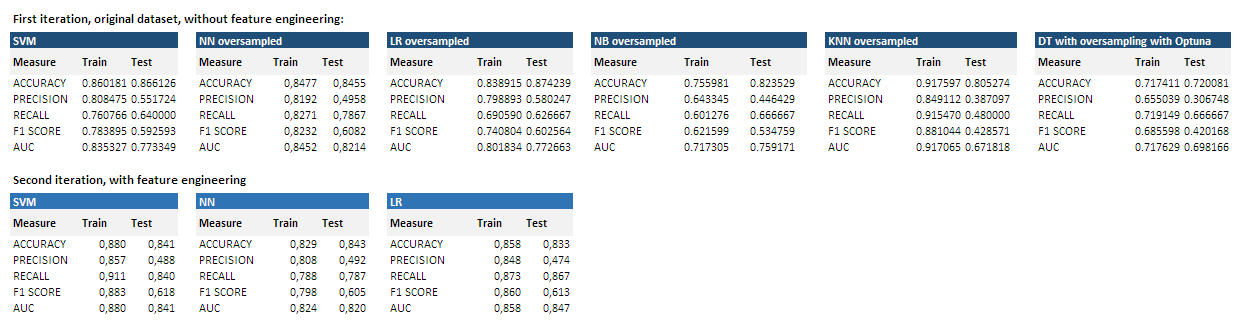

#### First iteration:

We explored and cleaned the data for the first set of iterations, without performing any feature engineering, only oversampling and hyper-tunning. We made tests with the following models: Support Vector Machine, Neural Network, Logistic Regression, Naïve Bayes, K-Nearest Neighbor, and Decision tree. We analyzed each model's results to understand the ones with the best performances. Based on the F1 Score and AUC results, it was possible to identify that Support Vector Machine, Neural Network, and Logistic Regression had better results, so they were selected for the second set of iterations with improvements in data preparation.

#### Second iteration:

On the second set of iterations, the SVM had good results for F1 and AUC, but this model turned out overfitted since the differences between the training and test results of F1 and AUC were the highest compared to other models. 
Based on the F1 and AUC results of NN  it was possible to understand that the model is less overfitted than LR, but with worse results. Considering that it is a model which is more difficult to interpret, we don't consider it the best option. 
The model with the best performance is LR, which has good results of F1 and AUC, and a low difference between training and test dataset scores, indicating that it is not overfitting. The great advantages of LR are that it is a simple model easy to interpret and LR identifies the features that explain the model and shows their importance by the coefficient values. 
We identified that clients that are more likely to accept the campaign have a bigger percentage of purchases in the store, have completed purchases recently, and are buying from the company for a long time. (Note: these features attributed by LR with bigger importance were engineered during the second iteration).

#### Choosing measures. Assumption 

The objective of the prediction is to identify the clients that are going to accept the campaign. Our assumption is that the company is using a low-cost method to promote the campaign such as sending e-mails or messages to the targeted clients. In this case, the company gets the most value by maximizing the reach of customers prone to accept the campaign, we assume that the effect of reaching out to customers not going to accept the offer is neglectable, compared to the loss of not contacting customers that were ready to accept. The model is designed to maximize the correct classification of the true positives and minimize the false negatives.
